### Resampling data and plotting it with pandas and Matplotlib 

We did our first data analysis with a large data set and saw how we could answer a research question based on a simple categorization. Although it produced good results, that sort of analysis is limited: it looks at the data at only one point in time. Analyzing data across time, on the other hand, allows us to look for trends and better understand the anomalies we encounter. By exploring the changes in data and isolating specific events, we can make meaningful connections between them. 

In 2017 and 2018, Twitter, Facebook, and Google were heavily criticized for allowing international agents to spread false or misleading content meant to influence public opinion in the US and abroad. This public scrutiny ultimately led to the publication of two major data bundles: one of Russian tweets that—according to Twitter, Congress, and various media reports— were used to manipulate the US media landscape, and another of Iranian tweets doing the same.

Our research question is straightforward: How many tweets related to Trump and Clinton were tweeted by Iranian actors over time? We’ll define Trump- and Clinton-related tweets as tweets that use hashtags containing the string `trump` or `clinton` (ignoring case).  

Here are the steps we need to take:
- Filter our data using a lambda function
- Format a data column into a datetime 
- Use the resample function
- plot the data with matplotlib


Let's start by important `pandas` and `matplotlib` (`import matplotlib.pyplot as plt`):

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Read in the csv file with the Iranian tweets. You can download them here and make sure you place the data into a `data` folder inside your project folder: [https://archive.org/details/iranian_tweets_csv_hashed/](https://archive.org/details/iranian_tweets_csv_hashed/)

In [2]:
%%time
tweets = pd.read_csv('../data/iranian_tweets_csv_hashed.csv')

CPU times: user 8.94 s, sys: 1.59 s, total: 10.5 s
Wall time: 11 s


In [3]:
tweets.head()

tweetid     userid user_display_name user_screen_name  \
0  533622371429543936  299148448        Maria Luis      marialuis91   
1  527205814906654721  299148448        Maria Luis      marialuis91   
2  545166827350134784  299148448        Maria Luis      marialuis91   
3  538045437316321280  299148448        Maria Luis      marialuis91   
4  530053681668841472  299148448        Maria Luis      marialuis91   

  user_reported_location                           user_profile_description  \
0         Nantes, France  journaliste indépendante/un vrai journaliste e...   
1         Nantes, France  journaliste indépendante/un vrai journaliste e...   
2         Nantes, France  journaliste indépendante/un vrai journaliste e...   
3         Nantes, France  journaliste indépendante/un vrai journaliste e...   
4         Nantes, France  journaliste indépendante/un vrai journaliste e...   

  user_profile_url  follower_count  following_count account_creation_date  \
0              NaN            8012             1450            2011-05-15   
1              NaN            8012             1450            2011-05-15   
2              NaN            8012             1450            2011-05-15   
3              NaN            8012             1450            2011-05-15   
4              NaN            8012             1450            2011-05-15   

      ...      latitude longitude quote_count reply_count like_count  \
0     ...           NaN       NaN         0.0         0.0        0.0   
1     ...           NaN       NaN         0.0         0.0        0.0   
2     ...           NaN       NaN         0.0         0.0        0.0   
3     ...           NaN       NaN         0.0         0.0        0.0   
4     ...           NaN       NaN         0.0         0.0        1.0   

   retweet_count hashtags                                               urls  \
0            0.0      NaN  [http://fr.awdnews.com/divertissements/5757-ce...   
1            0.0      NaN  [http://www.awdnews.com/top-news/10080-an-inqu...   
2            0.0      NaN  [http://www.awdnews.com/political/10404-cia-pr...   
3            0.0      NaN  [http://fr.awdnews.com/divertissements/5796-to...   
4            2.0      NaN  [http://fr.awdnews.com/soci%C3%A9t%C3%A9/5723-...   

         user_mentions poll_choices  
0          [574356455]          NaN  
1          [438542436]          NaN  
2  [823905, 256625456]          NaN  
3          [919513172]          NaN  
4           [83864876]          NaN  

[5 rows x 31 columns]

In [4]:
tweets.dtypes

tweetid                       int64
userid                       object
user_display_name            object
user_screen_name             object
user_reported_location       object
user_profile_description     object
user_profile_url             object
follower_count                int64
following_count               int64
account_creation_date        object
account_language             object
tweet_language               object
tweet_text                   object
tweet_time                   object
tweet_client_name            object
in_reply_to_tweetid         float64
in_reply_to_userid           object
quoted_tweet_tweetid        float64
is_retweet                     bool
retweet_userid               object
retweet_tweetid             float64
latitude                    float64
longitude                   float64
quote_count                 float64
reply_count                 float64
like_count                  float64
retweet_count               float64
hashtags                    

### Filter our data using a lambda function

We want a dataframe that contains only tweets relating to the 2016 presidential candidates. And we’re going to use a simple heuristic for this: include only tweets whose hashtags include the strings trump, clinton, or both. While this may not catch every tweet about Donald Trump or Hillary Clinton, it’s a clear-cut and easily understandable way to look at the activities of these misinformation agents.

For that we will:
- look for tweets that used hashtags containing the substrings `trump` or `clinton`
- filter down our data based on that condition

In [5]:
tweets['hashtags'].value_counts()

[]                                                                                                     557800
[realiran]                                                                                               2912
[InternationalQudsDay2018, QudsDay4Return, SavePalestine, QudsDay2018, FreePalestine, DeleteIsrael]      2073
[Iran]                                                                                                   1828
[Realiran]                                                                                               1575
[السعودية]                                                                                               1479
[Trump]                                                                                                  1195
[ليبيا_المختار]                                                                                          1173
[JordanNews]                                                                                             1162
[Yemen]   

In [6]:
tweets['includes_trump_or_clinton'] = tweets['hashtags'].apply(lambda x: 'clinton' in str(x).lower() or 'trump' in str(x).lower())

In [7]:
tweets[tweets['includes_trump_or_clinton'] == True].head(100)

tweetid                                             userid  \
394    964543820389109760                                         1394743334   
417    842984240140763140  e13ac4c5a61faca60ae766c342791c3f6ed8a72d7ad7e5...   
426    951400129356951552  f2a00a04e99197ee4e5fdfac4597bcc048695f6e588ae4...   
432    946110924645109760                                         3683769196   
433    954617032972087296                                 853233898398121984   
442    910213604422635522                                 853144291560042496   
494    994122693053206529  cf35b18dbb39a8e6f6983bfae226a11c0c16ff0b2bdbd4...   
564    869453815258525696  1bc6a9b22504e305649652bd85b042cc63ef745dc96c65...   
567    909012514255622144  1bc6a9b22504e305649652bd85b042cc63ef745dc96c65...   
647    952163481905754112                                 853144291560042496   
650    961232846689067009                                 853144291560042496   
654    972729025188782080                                 853144291560042496   
655   1014039183021821952                                 853144291560042496   
713    907945663828316160  6f2245bc7dd9aa440e83508525b3a79188b4218b2cb662...   
763   1003595534886752256  7c8f5ae87d4e46569735f1be0c61fda4e98444d30ae2f2...   
804    841989819370725377  e13ac4c5a61faca60ae766c342791c3f6ed8a72d7ad7e5...   
810    975895174055264256  1ddf57bdbd0d8f1bb810f55cb224a7e88d388d8d6c3655...   
885   1016265787521355778  2b7865142ead2dfd315a5ba4a391a2a525e7234e7f843f...   
904    827058504204705792  cfb431d28838bc87b3473081cc5899cfede8252c201564...   
1077   886471445043441665  1803a95a0ab8963650589f13672df24b04f51db32cf950...   
1089   914483386852548609  916699bf9e0967273d93bd6fc998c6c44ae8ab03c1d0ef...   
1224  1024359374989545472  4687ab9cb81194237c98b48ad8c9c77c4358cfc76d38a1...   
1265   795593456018194432  454d51cd3a15fe8e0456c19955f6368fea3be126726308...   
1402   837470523714076673                                         3364781501   
1755   889003291048382464  4f66aa46f33207ef1bc3572d3168c9d28764d9d2a53287...   
1776   968864617085759488  c811c5d64553dbcffc605ce17afd98756302b6c6b1a56e...   
1828  1030478004257005568  49d63e031ef5dd7b755648266a105240c37a2d25ea73db...   
1867   848884718070321152  cfb431d28838bc87b3473081cc5899cfede8252c201564...   
1961   773488286371237888  d000b777d1be14351bfc11a6fe77c71138eecfb8206e2e...   
1974   803512414604054528  454d51cd3a15fe8e0456c19955f6368fea3be126726308...   
...                   ...                                                ...   
3864   914473973987110912  78652843d32cb88963740f927c50b94c65ea1e6e9daf47...   
3931   756878601786564608                                         3364781501   
4024  1019073622651088897  2e000a0e6ba11477c5e79015b1f5c0bee00641d55fc077...   
4025  1018384833934868480  2e000a0e6ba11477c5e79015b1f5c0bee00641d55fc077...   
4026  1001378130357972992  2adfaf375f8afa4e6b9dafaa207a841806f3fca300a1a0...   
4028   953881431943663616  2adfaf375f8afa4e6b9dafaa207a841806f3fca300a1a0...   
4066  1031905111415517186  dd57f496213c56fa72b22865e5613897b0d6a70d02153b...   
4067  1026051364642869248  dd57f496213c56fa72b22865e5613897b0d6a70d02153b...   
4114   914485951199694848  04655f1ce2ddf09e7341e6238415cd4f8844cc993952e2...   
4258   919322341603266560  7c8f5ae87d4e46569735f1be0c61fda4e98444d30ae2f2...   
4298   983226340315947008  e3564a01bca8a00ef2f377c0582cd2f7026805b2df6d74...   
4305   914490188411363328  3df15dd0486a5835e5965f6e655dc96b5db270c206f840...   
4309   958688849269583872  3df15dd0486a5835e5965f6e655dc96b5db270c206f840...   
4311   914724580689874944  3df15dd0486a5835e5965f6e655dc96b5db270c206f840...   
4662   904596148979204104  1fd0ed9f8d4e3966ed7ba6941d24072d6582e9aa0fda18...   
4857   917053878394376192  4f66aa46f33207ef1bc3572d3168c9d28764d9d2a53287...   
4858   910869333815054336  4f66aa46f33207ef1bc3572d3168c9d28764d9d2a53287...   
5121  1006142080257839104  5bdcb23d285b99bc1a79e8e0f16feb381ba8eebcf8501e...   
5179  101438707200

In [8]:
tweets_subset = tweets[tweets['includes_trump_or_clinton'] == True]

### Resampling our data over time

To get a tally of these tweets over time we need to:
- format a column as a date time
- set the index of our dataframe to this date time column
- resample our dataframe 

In [9]:
tweets_subset.dtypes

tweetid                        int64
userid                        object
user_display_name             object
user_screen_name              object
user_reported_location        object
user_profile_description      object
user_profile_url              object
follower_count                 int64
following_count                int64
account_creation_date         object
account_language              object
tweet_language                object
tweet_text                    object
tweet_time                    object
tweet_client_name             object
in_reply_to_tweetid          float64
in_reply_to_userid            object
quoted_tweet_tweetid         float64
is_retweet                      bool
retweet_userid                object
retweet_tweetid              float64
latitude                     float64
longitude                    float64
quote_count                  float64
reply_count                  float64
like_count                   float64
retweet_count                float64
h

In [10]:
tweets_subset['tweet_time'] = tweets_subset['tweet_time'].astype('datetime64[ns]')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
tweets_subset.dtypes

tweetid                               int64
userid                               object
user_display_name                    object
user_screen_name                     object
user_reported_location               object
user_profile_description             object
user_profile_url                     object
follower_count                        int64
following_count                       int64
account_creation_date                object
account_language                     object
tweet_language                       object
tweet_text                           object
tweet_time                   datetime64[ns]
tweet_client_name                    object
in_reply_to_tweetid                 float64
in_reply_to_userid                   object
quoted_tweet_tweetid                float64
is_retweet                             bool
retweet_userid                       object
retweet_tweetid                     float64
latitude                            float64
longitude                       

In [12]:
tweets_over_time = tweets_subset.set_index('tweet_time')
tweets_over_time.head()

tweetid  \
tweet_time                                
2018-02-16 16:55:00  964543820389109760   
2017-03-18 06:21:00  842984240140763140   
2018-01-11 10:27:00  951400129356951552   
2017-12-27 20:09:00  946110924645109760   
2018-01-20 07:30:00  954617032972087296   

                                                                userid  \
tweet_time                                                               
2018-02-16 16:55:00                                         1394743334   
2017-03-18 06:21:00  e13ac4c5a61faca60ae766c342791c3f6ed8a72d7ad7e5...   
2018-01-11 10:27:00  f2a00a04e99197ee4e5fdfac4597bcc048695f6e588ae4...   
2017-12-27 20:09:00                                         3683769196   
2018-01-20 07:30:00                                 853233898398121984   

                                                     user_display_name  \
tweet_time                                                               
2018-02-16 16:55:00                               RealProgressiveFront   
2017-03-18 06:21:00  e13ac4c5a61faca60ae766c342791c3f6ed8a72d7ad7e5...   
2018-01-11 10:27:00  f2a00a04e99197ee4e5fdfac4597bcc048695f6e588ae4...   
2017-12-27 20:09:00                                 Alwaght en Español   
2018-01-20 07:30:00                                RiseAgainstTheRight   

                                                      user_screen_name  \
tweet_time                                                               
2018-02-16 16:55:00                                            RPFront   
2017-03-18 06:21:00  e13ac4c5a61faca60ae766c342791c3f6ed8a72d7ad7e5...   
2018-01-11 10:27:00  f2a00a04e99197ee4e5fdfac4597bcc048695f6e588ae4...   
2017-12-27 20:09:00                                          AlwaghtEs   
2018-01-20 07:30:00                                       riseagainstr   

                     user_reported_location  \
tweet_time                                    
2018-02-16 16:55:00           United States   
2017-03-18 06:21:00              Dallas, TX   
2018-01-11 10:27:00  California,Los Angeles   
2017-12-27 20:09:00                     NaN   
2018-01-20 07:30:00         California, USA   

                                              user_profile_description  \
tweet_time                                                               
2018-02-16 16:55:00  “RPFront” is an NGO aims to support people’s m...   
2017-03-18 06:21:00                                    Resist and Pray   
2018-01-11 10:27:00                                         Journalist   
2017-12-27 20:09:00                                                NaN   
2018-01-20 07:30:00                               RiseAgainstTheRight.   

                            user_profile_url  follower_count  following_count  \
tweet_time                                                                      
2018-02-16 16:55:00  https://t.co/f3Ui2iVGkz            7099              921   
2017-03-18 06:21:00                      NaN            2343             2088   
2018-01-11 10:27:00  https://t.co/LaseVK51H0             241              316   
2017-12-27 20:09:00   http://t.co/tBLghK2kws            6817             4374   
2018-01-20 07:30:00                      NaN            5839             5675   

                    account_creation_date            ...              \
tweet_time                                           ...               
2018-02-16 16:55:00            2013-05-01            ...               
2017-03-18 06:21:00            2017-03-08            ...               
2018-01-11 10:27:00            2018-01-10            ...               
2017-12-27 20:09:00            2015-09-17            ...               
2018-01-20 07:30:00            2017-04-15            ...               

                    longitude quote_count reply_count like_count  \
tweet_time                                                         
2018-02-16 16:55:00       NaN         0.0         0.0        7.0   
2017-03-18 06:21:00       NaN         0.0      

In [13]:
tweet_tally = tweets_over_time.resample('M').count()
tweet_tally.head()

tweetid  userid  user_display_name  user_screen_name  \
tweet_time                                                         
2013-08-31        1       1                  1                 1   
2013-09-30        0       0                  0                 0   
2013-10-31        0       0                  0                 0   
2013-11-30        2       2                  2                 2   
2013-12-31        0       0                  0                 0   

            user_reported_location  user_profile_description  \
tweet_time                                                     
2013-08-31                       1                         1   
2013-09-30                       0                         0   
2013-10-31                       0                         0   
2013-11-30                       2                         2   
2013-12-31                       0                         0   

            user_profile_url  follower_count  following_count  \
tweet_time                                                      
2013-08-31                 1               1                1   
2013-09-30                 0               0                0   
2013-10-31                 0               0                0   
2013-11-30                 2               2                2   
2013-12-31                 0               0                0   

            account_creation_date            ...              longitude  \
tweet_time                                   ...                          
2013-08-31                      1            ...                      0   
2013-09-30                      0            ...                      0   
2013-10-31                      0            ...                      0   
2013-11-30                      2            ...                      0   
2013-12-31                      0            ...                      0   

            quote_count  reply_count  like_count  retweet_count  hashtags  \
tweet_time                                                                  
2013-08-31            1            1           1              1         1   
2013-09-30            0            0           0              0         0   
2013-10-31            0            0           0              0         0   
2013-11-30            2            2           2              2         2   
2013-12-31            0            0           0              0         0   

            urls  user_mentions  poll_choices  includes_trump_or_clinton  
tweet_time                                                                
2013-08-31     1              0             0                          1  
2013-09-30     0              0             0                          0  
2013-10-31     0              0             0                          0  
2013-11-30     2              0             0                          2  
2013-12-31     0              0             0                          0  

[5 rows x 31 columns]

In [14]:
monthly_tweet_count = tweet_tally['tweetid']
monthly_tweet_count.head()

tweet_time
2013-08-31    1
2013-09-30    0
2013-10-31    0
2013-11-30    2
2013-12-31    0
Freq: M, Name: tweetid, dtype: int64

### Plot your data 

Now it's time to plot your data to better understand trends over time!

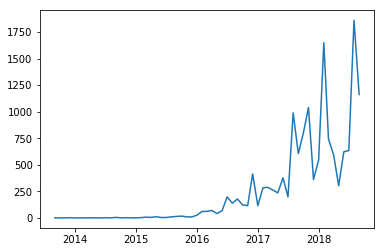

In [15]:
plt.plot(monthly_tweet_count)

In [16]:
len(tweets['tweetid'])

1122936

In [17]:
len(tweets)

1122936